In [59]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy.cluster.hierarchy import dendrogram, linkage
from feature_engine.selection import DropDuplicateFeatures, DropConstantFeatures

In [2]:
data_origin=pd.read_excel('dataset2.xlsx')

In [3]:
data=pd.read_csv('Data_final_encuestas_f2.csv')

In [4]:
data

,Unnamed: 0,nocues,nhog,miembro,f_calib3,region,aglo,t_aglo,estrato_U,cod_U,...,v210a_9.0,v210a_3.0,v210a_1.0,v210a_7.0,v210a_8.0,ITLi_d_9.0,ITLi_d_2.0,ITLi_d_3.0,ITLi_d_1.0,ITLi_d_4.0
0,0,1.0,1.0,1.0,778.0,3.0,6.0,4.0,164.0,682.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1.0,1.0,2.0,778.0,3.0,6.0,4.0,164.0,682.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,1.0,1.0,3.0,778.0,3.0,6.0,4.0,164.0,682.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3,1.0,1.0,4.0,778.0,3.0,6.0,4.0,164.0,682.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4,1.0,1.0,5.0,778.0,3.0,6.0,4.0,164.0,682.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27600,27605,8307.0,1.0,6.0,778.0,8.0,6.0,2.0,240.0,440.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
27601,27606,8307.0,1.0,7.0,778.0,8.0,6.0,2.0,240.0,440.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
27602,27607,8307.0,1.0,8.0,778.0,8.0,6.0,2.0,240.0,440.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
27603,27608,8308.0,1.0,1.0,546.0,8.0,6.0,2.0,240.0,440.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
data.describe()

,Unnamed: 0,nocues,nhog,miembro,f_calib3,region,aglo,t_aglo,estrato_U,cod_U,...,v210a_9.0,v210a_3.0,v210a_1.0,v210a_7.0,v210a_8.0,ITLi_d_9.0,ITLi_d_2.0,ITLi_d_3.0,ITLi_d_1.0,ITLi_d_4.0
count,27605.000000,27605.000000,27605.000000,27605.000000,27605.000000,27605.000000,27605.000000,27605.000000,27605.000000,27605.000000,...,27605.000000,27605.000000,27605.000000,27605.000000,27605.000000,27605.000000,27605.000000,27605.000000,27605.000000,27605.000000
mean,13803.171925,4064.496504,1.031987,2.673030,1356.940446,4.567832,4.841188,1.862996,145.345590,540.708277,...,0.694765,0.106792,0.105705,0.044412,0.026517,0.644376,0.046658,0.044412,0.042311,0.039775
std,7970.339939,2396.117955,0.199510,1.694078,1516.431742,2.197354,1.742891,1.071962,75.144421,258.655086,...,0.460515,0.308855,0.307466,0.206013,0.160670,0.478711,0.210910,0.206013,0.201302,0.195435
min,0.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6901.000000,1965.000000,1.000000,1.000000,540.000000,3.000000,4.000000,1.000000,83.000000,335.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13802.000000,4029.000000,1.000000,2.000000,895.000000,5.000000,6.000000,1.000000,145.000000,559.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,20705.000000,6140.000000,1.000000,4.000000,1567.000000,7.000000,6.000000,3.000000,215.000000,760.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,27609.000000,8308.000000,5.000000,17.000000,27258.000000,8.000000,6.000000,4.000000,268.000000,984.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
vars_general=['Unnamed: 0','nocues', 'nhog', 'miembro', 'f_calib3', 'region', 'aglo', 't_aglo','estrato_U', 'cod_U']

vars_cat_men_3=['v215a_1.0', 'v215a_9.0', 'v216a_1.0', 'v216a_9.0', 'v217a_1.0','v217a_9.0', 'v114_2.0', 'v114_9.0', 'v117_2.0', 'v117_9.0', 'v122_2.0',
       'v122_9.0', 'v153_2.0', 'v153_9.0', 'v154_2.0', 'v154_9.0', 'v155_2.0','v155_9.0', 'v156_2.0', 'v156_9.0', 'v157_2.0', 'v157_9.0', 'v158_2.0',
       'v158_9.0', 'v159_2.0', 'v159_9.0', 'v161_2.0', 'v161_9.0', 'v162_2.0', 'v162_9.0', 'v171_2.0', 'v171_9.0', 'v145_2.0', 'v145_9.0', 'v160_2.0',
       'v160_9.0', 'v172_2.0', 'v172_9.0', 'v173_2.0', 'v173_9.0', 'v186_2.0','v186_9.0', 'v204_2.0', 'v204_9.0', 'v207_2.0', 'v207_9.0', 'v214a_1.0',
       'v214a_9.0', 'v124_2.0', 'v124_9.0', 'v180_2.0', 'v180_9.0', 'v213a_9.0']
var_num=['v213bi', 'v214bi', 'v215bi', 'v216bi', 'v217bi', 'v163', 'v182caes', 'v183ciuo', 'v183cno', 'ITI', 'v213b', 'ITLi','v108','t_hogar']

var_sin_na=['v109', 'v110', 'v111', 'c_hogar', 'nivel_ed', 'v134a', 'v135', 'v139', 'v141', 'v142', 'v164', 'estado']

In [7]:
var_cat_may_3=data.drop(columns=vars_general+vars_cat_men_3+var_num+var_sin_na).columns

In [8]:
print(len(vars_general))
print(len(var_sin_na))
print(len(var_num))
print(len(vars_cat_men_3))
print(len(var_cat_may_3))
print(len(vars_general)+len(vars_cat_men_3)+len(var_num)+len(var_sin_na)+len(var_cat_may_3))

10
12
14
53
233
322


## Duplicated features with Feature-engine

In [9]:
pipe = Pipeline([
    ('constant', DropConstantFeatures(tol=0.998)),
    ('duplicated', DropDuplicateFeatures()),
])

pipe.fit(data)

Pipeline(steps=[('constant', DropConstantFeatures(tol=0.998)),
                ('duplicated', DropDuplicateFeatures())])

In [10]:
# remove features

data = pipe.transform(data)
data

,Unnamed: 0,nocues,nhog,miembro,f_calib3,region,aglo,t_aglo,estrato_U,cod_U,...,v210a_9.0,v210a_3.0,v210a_1.0,v210a_7.0,v210a_8.0,ITLi_d_9.0,ITLi_d_2.0,ITLi_d_3.0,ITLi_d_1.0,ITLi_d_4.0
0,0,1.0,1.0,1.0,778.0,3.0,6.0,4.0,164.0,682.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1.0,1.0,2.0,778.0,3.0,6.0,4.0,164.0,682.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,1.0,1.0,3.0,778.0,3.0,6.0,4.0,164.0,682.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3,1.0,1.0,4.0,778.0,3.0,6.0,4.0,164.0,682.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4,1.0,1.0,5.0,778.0,3.0,6.0,4.0,164.0,682.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27600,27605,8307.0,1.0,6.0,778.0,8.0,6.0,2.0,240.0,440.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
27601,27606,8307.0,1.0,7.0,778.0,8.0,6.0,2.0,240.0,440.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
27602,27607,8307.0,1.0,8.0,778.0,8.0,6.0,2.0,240.0,440.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
27603,27608,8308.0,1.0,1.0,546.0,8.0,6.0,2.0,240.0,440.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
len(pipe.named_steps['constant'].features_to_drop_)

12

In [12]:
len(pipe.named_steps['duplicated'].features_to_drop_)

12

In [13]:
322-298

24

In [14]:
pipe.named_steps['duplicated'].features_to_drop_

{'cat_ocup_9.0',
 'v119_9.0',
 'v153_9.0',
 'v154_9.0',
 'v155_9.0',
 'v156_9.0',
 'v157_9.0',
 'v158_9.0',
 'v161_9.0',
 'v162_9.0',
 'v169_9.0',
 'v209_9.0'}

In [15]:
data[var_num]

,v213bi,v214bi,v215bi,v216bi,v217bi,v163,v182caes,v183ciuo,v183cno,ITI,v213b,ITLi,v108,t_hogar
0,4500.0,0.0,0.0,0.0,0.0,10.0,8401.0,3120.0,72203.0,4500.000000,4500.000000,4500.000000,56.0,5.0
1,4000.0,0.0,0.0,0.0,0.0,14.0,8501.0,2330.0,41312.0,4000.000000,4000.000000,4000.000000,51.0,5.0
2,0.0,0.0,0.0,0.0,0.0,25.0,4804.0,5223.0,30314.0,95.794861,191.135047,193.736619,31.0,5.0
3,0.0,0.0,0.0,0.0,0.0,12.0,800.0,8111.0,70313.0,95.615012,1933.326609,1933.326609,31.0,5.0
4,0.0,0.0,0.0,0.0,0.0,3.0,6922.0,4900.0,28250.4,83.597514,106.742496,103.468720,7.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27600,0.0,0.0,0.0,1014.0,0.0,3.0,4000.0,7131.0,5002.0,1014.000000,256.554478,275.112981,10.0,8.0
27601,0.0,0.0,0.0,0.0,0.0,1.0,4440.6,7983.4,77884.4,83.597387,106.765348,103.483595,5.0,8.0
27602,0.0,0.0,0.0,0.0,0.0,8.0,4240.6,6153.0,63077.4,83.546284,106.443719,100.539291,1.0,8.0
27603,25353.0,0.0,0.0,0.0,0.0,35.0,3800.0,9611.0,56314.0,25353.000000,25353.000000,25353.000000,42.0,7.0


In [16]:
data[var_num].describe()

,v213bi,v214bi,v215bi,v216bi,v217bi,v163,v182caes,v183ciuo,v183cno,ITI,v213b,ITLi,v108,t_hogar
count,27605.000000,27605.000000,27605.000000,27605.000000,27605.000000,27605.000000,27605.000000,27605.000000,27605.000000,27605.000000,27605.000000,27605.000000,27605.000000,27605.000000
mean,2504.244218,53.725088,652.245869,146.164296,167.294222,11.933256,5945.713503,6142.285320,47047.976008,3723.802324,2992.437751,3047.910878,33.287955,4.346423
std,5000.590342,577.405281,2206.249595,662.014952,1215.268857,13.699011,2402.020024,1992.598402,20990.103628,5600.018618,4988.316016,5103.689357,22.256161,2.034108
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,110.000000,1001.000000,80.000000,90.000000,90.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4329.449574,5120.000000,32655.000000,83.597534,106.776894,103.491225,15.000000,3.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5621.000000,6153.000000,47925.800000,1865.333333,746.098807,689.440340,30.000000,4.000000
75%,3500.000000,0.000000,0.000000,0.000000,0.000000,15.000000,8401.000000,7411.000000,60203.000000,5198.000000,4174.806076,4220.000000,50.000000,5.000000
max,84510.000000,25412.000000,50706.000000,33804.000000,79000.000000,96.000000,9999.000000,9999.000000,99999.000000,104000.000000,84510.000000,84510.000000,99.000000,17.000000


# Análisis exploratorio de datos

## Monto de ingreso neto en ocupación principal del mes pasado (imputado)  

In [17]:
data['v213bi'].value_counts().sort_index(ascending=False)

84510.000000        1
76059.000000        1
72679.000000        1
67608.000000        1
60000.000000        1
                ...  
106.000000          1
100.000000          8
98.368728           1
90.000000           1
0.000000        16790
Name: v213bi, Length: 576, dtype: int64

## Monto de ingreso neto en otras ocupaciones del mes pasado (imputado)  

In [18]:
data['v214bi'].value_counts().sort_index(ascending=False)

25412.000000        1
20000.000000        1
18000.000000        2
17000.000000        1
16902.000000        1
                ...  
55.705384           1
33.660014           1
27.935442           1
24.915742           1
0.000000        27082
Name: v214bi, Length: 152, dtype: int64

## Monto de ingreso por jubilaciones o pensiones el mes pasado (imputado)  

In [19]:
data['v215bi'].value_counts().sort_index(ascending=False)

50706.0        1
46126.0        1
40565.0        1
35000.0        2
33804.0        4
           ...  
300.0          1
271.0          2
219.4          1
156.0          3
0.0        23763
Name: v215bi, Length: 426, dtype: int64

## Monto de ingreso por pensiones sociales, AHU u otros planes sociales el mes pasado (imputado)  

In [20]:
data['v216bi'].value_counts().sort_index(ascending=False)

33804.0        1
30424.0        1
25353.0        1
16902.0        1
16000.0        5
           ...  
90.0           1
89.0           1
80.0           3
60.0           1
0.0        23332
Name: v216bi, Length: 312, dtype: int64

## Monto de otros ingresos el mes pasado (imputado)   

In [21]:
data['v217bi'].value_counts().sort_index(ascending=False)

79000.0        2
30000.0        1
28000.0        1
24933.0        2
23102.0        3
           ...  
150.0          4
130.0          1
106.0          1
100.0          9
0.0        25989
Name: v217bi, Length: 240, dtype: int64

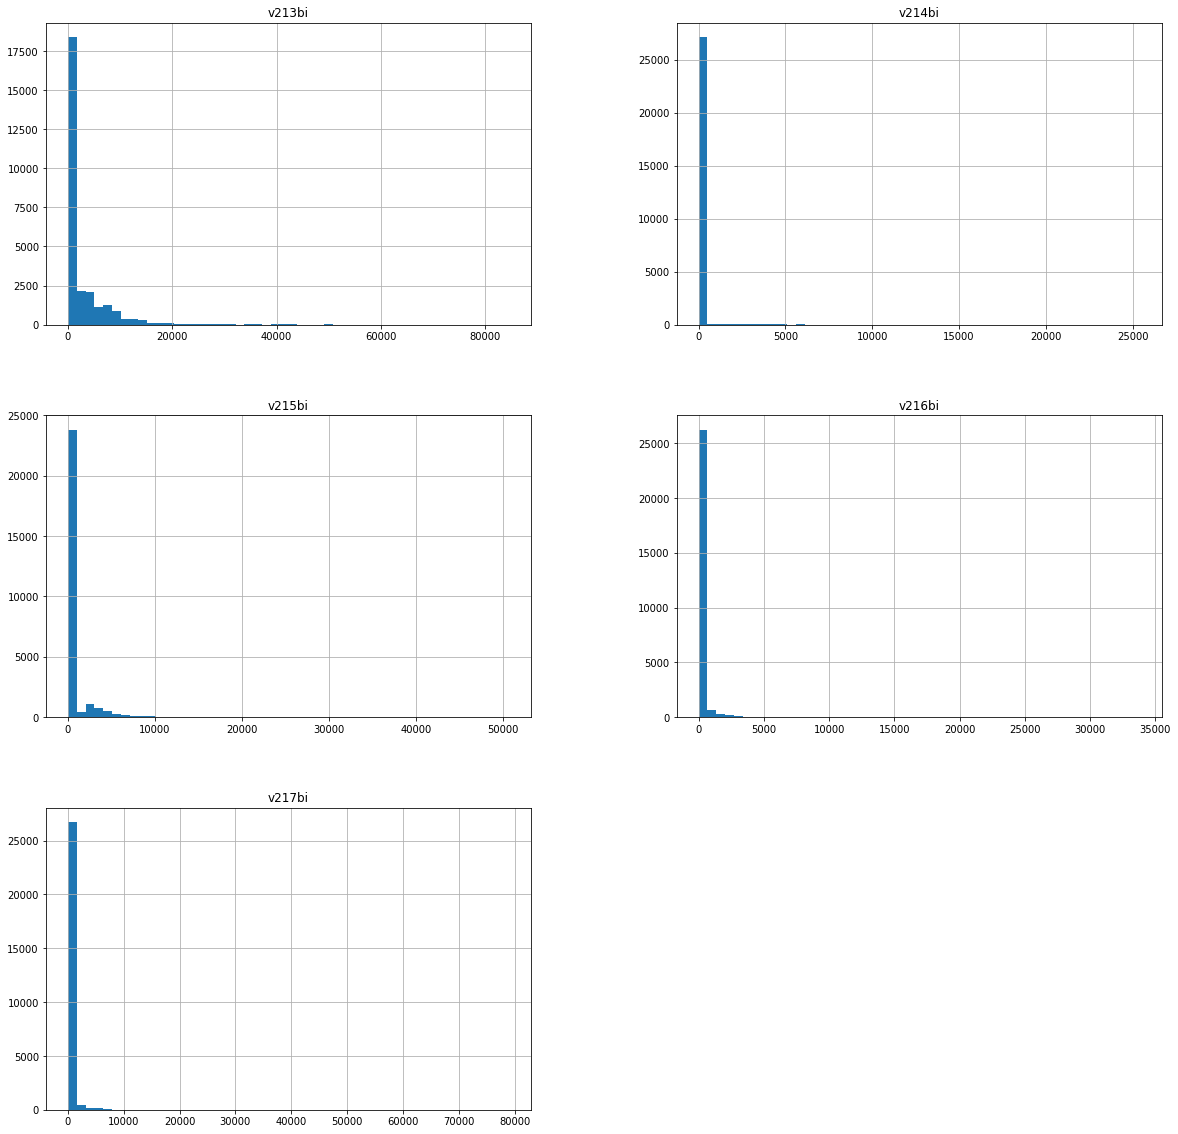

In [22]:
data[['v213bi','v214bi','v215bi','v216bi','v217bi']].hist(bins=50,figsize=(20,20));

## Cantidad de horas dedicadas a las actividades de la casa mencionadas  

In [23]:
data['v163'].value_counts().sort_index(ascending=False)

96.000000       1
95.000000       1
94.000000       3
93.000000       1
92.000000       4
             ... 
1.455896        1
1.400000       18
1.000000     1411
0.060201        1
0.000000     4197
Name: v163, Length: 206, dtype: int64

## Código de Actividad Económica (CAES Mercosur 1.0)  

In [24]:
data['v182caes'].value_counts().sort_index(ascending=False)

9999.000000     545
9700.000000    1788
9618.964633       2
9614.585805       2
9609.000000      39
               ... 
104.000000       15
103.000000       38
102.000000       90
101.000000      350
100.000000        7
Name: v182caes, Length: 1023, dtype: int64

## Tipo de ocupación (Clasificación Internacional Uniforme de Ocupaciones 2008)  

In [25]:
data['v183ciuo'].value_counts().sort_index(ascending=False)

9999.0    384
9629.0      8
9623.0      1
9622.0     28
9621.0    110
         ... 
1112.0     13
1111.0      1
310.0      33
210.0      10
110.0       5
Name: v183ciuo, Length: 1363, dtype: int64

## Tipo de ocupación (Clasificador Nacional de Ocupaciones 2001)  

In [26]:
data['v183cno'].value_counts().sort_index(ascending=False)

99999.0    405
92393.0      3
92392.0      5
92333.0      3
92332.0     17
          ... 
5002.0     532
5001.0     135
3001.0      80
2001.0       6
1001.0       3
Name: v183cno, Length: 1472, dtype: int64

## Monto de ingreso total individual  

In [27]:
data['ITI'].value_counts().sort_index(ascending=False)

104000.000000       1
84510.000000        1
83665.000000        1
79000.000000        1
76059.000000        1
                 ... 
83.584259           8
83.580273          76
83.578016          14
83.546284        1221
80.000000           3
Name: ITI, Length: 2800, dtype: int64

## Monto de ingreso total laboral  

In [28]:
data['ITLi'].value_counts().sort_index(ascending=False)

84510.000000    1
76059.000000    1
72679.000000    1
67608.000000    1
60000.000000    1
               ..
97.774347       1
97.765225       1
97.760748       4
97.757581       1
90.000000       1
Name: ITLi, Length: 7404, dtype: int64

## Monto de ingreso neto en ocupación principal del mes pasado  

In [29]:
data['v213b'].value_counts().sort_index(ascending=False)

84510.000000    1
76059.000000    1
72679.000000    1
67608.000000    1
60000.000000    1
               ..
97.820285       1
97.811666       1
97.799679       1
97.798253       2
90.000000       1
Name: v213b, Length: 9688, dtype: int64

## Edad

In [30]:
data['v108'].value_counts().sort_index(ascending=False)

99.0      6
97.0      6
96.0      7
95.0      4
94.0     10
       ... 
4.0     448
3.0     454
2.0     452
1.0     397
0.0     409
Name: v108, Length: 99, dtype: int64

## Cantidad de personas en el hogar 

In [31]:
data['t_hogar'].value_counts().sort_index(ascending=False)

17.0      17
14.0      14
13.0      13
12.0      36
11.0      66
10.0     410
9.0      495
8.0     1024
7.0     1689
6.0     2916
5.0     4755
4.0     6156
3.0     4929
2.0     3834
1.0     1251
Name: t_hogar, dtype: int64

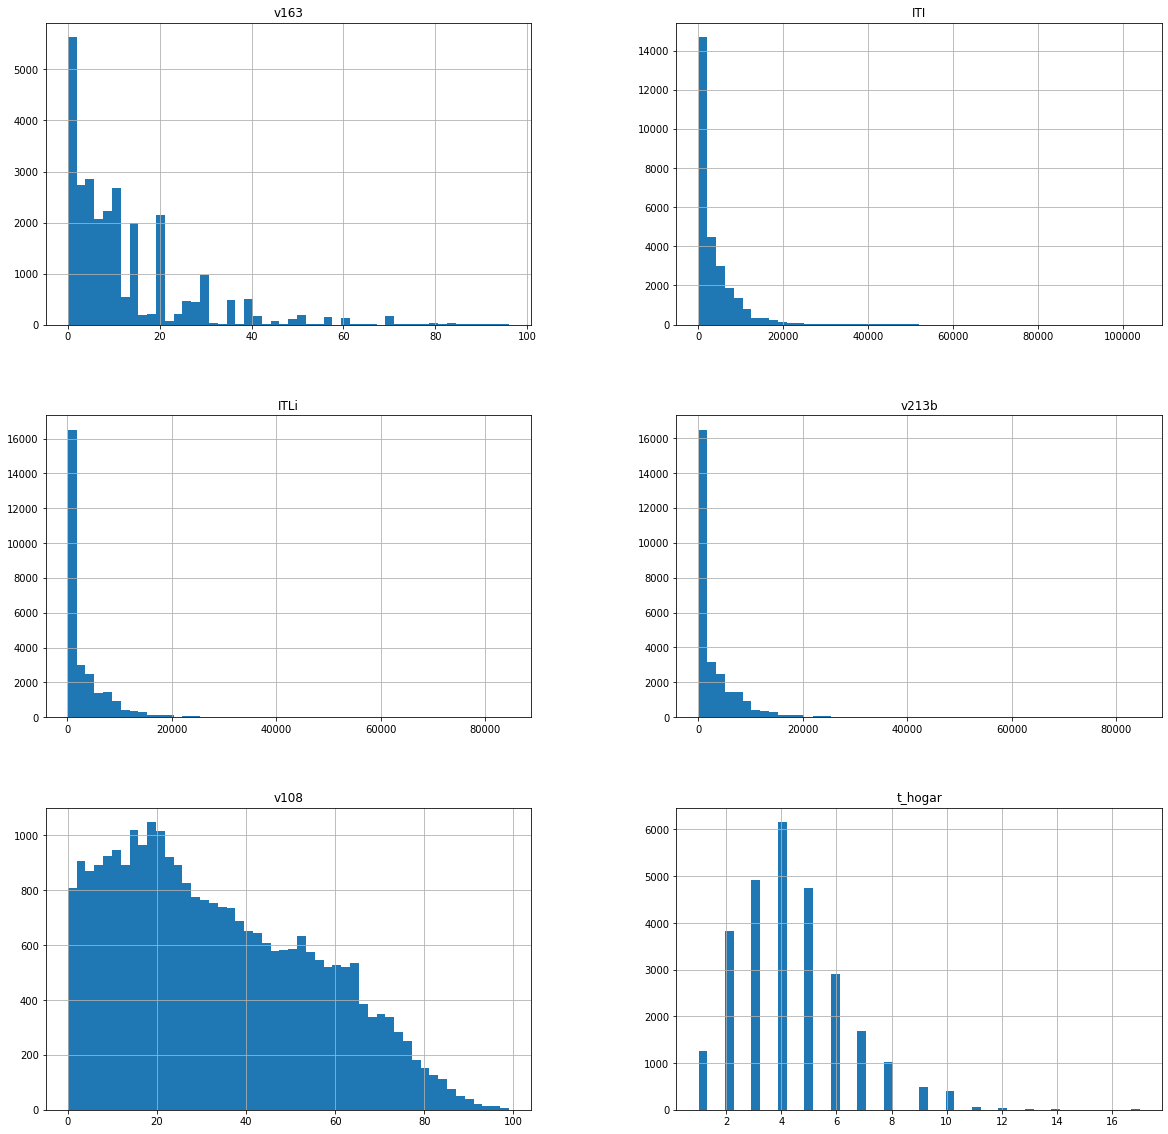

In [32]:
data[['v163','ITI','ITLi','v213b','v108','t_hogar']].hist(bins=50,figsize=(20,20));

# Analisis de proceso jerarquico


In [33]:
data_cluster=data[var_num].drop(columns=['v182caes','v183ciuo','v183cno'])

In [34]:
data_cluster

,v213bi,v214bi,v215bi,v216bi,v217bi,v163,ITI,v213b,ITLi,v108,t_hogar
0,4500.0,0.0,0.0,0.0,0.0,10.0,4500.000000,4500.000000,4500.000000,56.0,5.0
1,4000.0,0.0,0.0,0.0,0.0,14.0,4000.000000,4000.000000,4000.000000,51.0,5.0
2,0.0,0.0,0.0,0.0,0.0,25.0,95.794861,191.135047,193.736619,31.0,5.0
3,0.0,0.0,0.0,0.0,0.0,12.0,95.615012,1933.326609,1933.326609,31.0,5.0
4,0.0,0.0,0.0,0.0,0.0,3.0,83.597514,106.742496,103.468720,7.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
27600,0.0,0.0,0.0,1014.0,0.0,3.0,1014.000000,256.554478,275.112981,10.0,8.0
27601,0.0,0.0,0.0,0.0,0.0,1.0,83.597387,106.765348,103.483595,5.0,8.0
27602,0.0,0.0,0.0,0.0,0.0,8.0,83.546284,106.443719,100.539291,1.0,8.0
27603,25353.0,0.0,0.0,0.0,0.0,35.0,25353.000000,25353.000000,25353.000000,42.0,7.0


In [35]:
data_cluster.describe()

,v213bi,v214bi,v215bi,v216bi,v217bi,v163,ITI,v213b,ITLi,v108,t_hogar
count,27605.000000,27605.000000,27605.000000,27605.000000,27605.000000,27605.000000,27605.000000,27605.000000,27605.000000,27605.000000,27605.000000
mean,2504.244218,53.725088,652.245869,146.164296,167.294222,11.933256,3723.802324,2992.437751,3047.910878,33.287955,4.346423
std,5000.590342,577.405281,2206.249595,662.014952,1215.268857,13.699011,5600.018618,4988.316016,5103.689357,22.256161,2.034108
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,80.000000,90.000000,90.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,83.597534,106.776894,103.491225,15.000000,3.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1865.333333,746.098807,689.440340,30.000000,4.000000
75%,3500.000000,0.000000,0.000000,0.000000,0.000000,15.000000,5198.000000,4174.806076,4220.000000,50.000000,5.000000
max,84510.000000,25412.000000,50706.000000,33804.000000,79000.000000,96.000000,104000.000000,84510.000000,84510.000000,99.000000,17.000000


## Correlacion

In [36]:
data_cluster.corr()

,v213bi,v214bi,v215bi,v216bi,v217bi,v163,ITI,v213b,ITLi,v108,t_hogar
v213bi,1.000000,0.105831,-0.092805,-0.057927,0.056243,0.017553,0.853215,0.950584,0.943325,0.204622,-0.152128
v214bi,0.105831,1.000000,-0.019088,-0.011608,0.037994,0.012226,0.193059,0.098390,0.207661,0.035866,-0.039770
v215bi,-0.092805,-0.019088,1.000000,-0.012160,0.070254,0.067308,0.309609,0.007617,0.005604,0.462390,-0.231910
v216bi,-0.057927,-0.011608,-0.012160,1.000000,0.021115,-0.009097,0.054336,-0.044537,-0.044288,-0.041510,0.029403
v217bi,0.056243,0.037994,0.070254,0.021115,1.000000,0.024485,0.296549,0.098372,0.095239,0.085436,-0.097016
v163,0.017553,0.012226,0.067308,-0.009097,0.024485,1.000000,0.043964,0.024534,0.025079,0.272542,-0.116466
ITI,0.853215,0.193059,0.309609,0.054336,0.296549,0.043964,1.000000,0.906528,0.914722,0.385214,-0.244834
v213b,0.950584,0.098390,0.007617,-0.044537,0.098372,0.024534,0.906528,1.000000,0.987285,0.263622,-0.177661
ITLi,0.943325,0.207661,0.005604,-0.044288,0.095239,0.025079,0.914722,0.987285,1.000000,0.261558,-0.178794
v108,0.204622,0.035866,0.462390,-0.041510,0.085436,0.272542,0.385214,0.263622,0.261558,1.000000,-0.391762


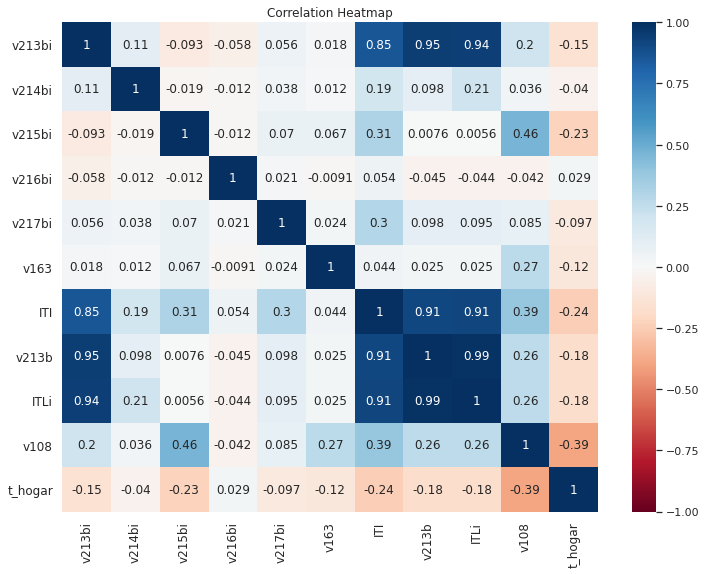

In [38]:
plt.figure(figsize = (12, 9))
s = sns.heatmap(data_cluster.corr(),
               annot = True, 
               cmap = 'RdBu',
               vmin = -1, 
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

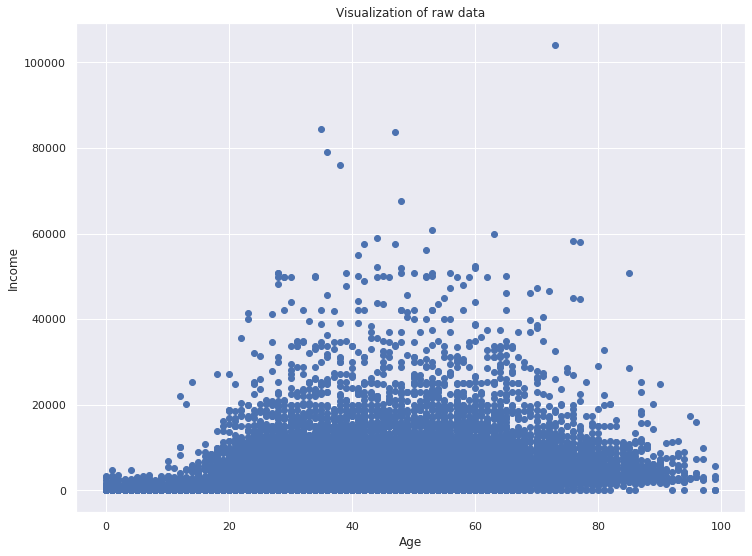

In [40]:
plt.figure(figsize = (12, 9))
plt.scatter(data_cluster.iloc[:, 9], data_cluster.iloc[:, 6])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Visualization of raw data');

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering   # Clustering jerárquico
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import StandardScaler, normalize

In [42]:
scaler = StandardScaler()
data_cluster_scaled = scaler.fit_transform(data_cluster)

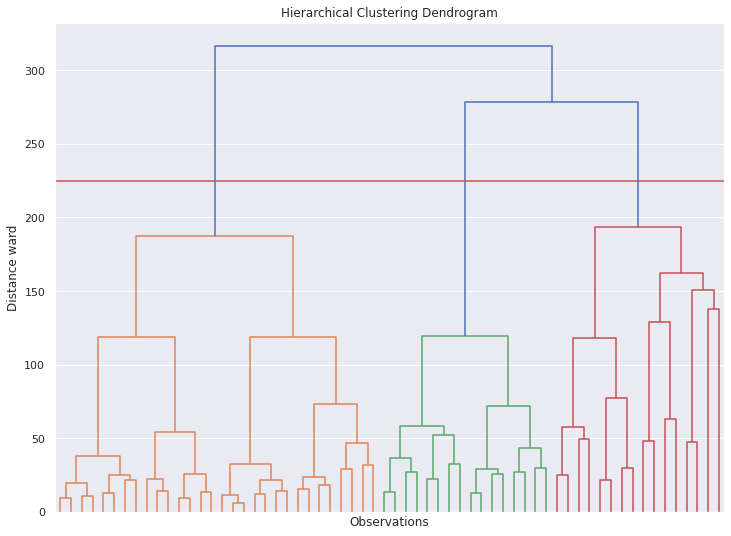

In [61]:
plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance ward')
dendrogram(linkage(data_cluster_scaled, method = 'ward'),
           truncate_mode = 'level',
           p = 5,
           show_leaf_counts = False,
           no_labels = True)
plt.axhline(225, c='r')
plt.show()

Se observa que el corte intersecta con 7 líneas verticales, esto significa que vamos a utilizar el método de clustering jerárquico de sklearn con n_clusters=7

In [47]:
from sklearn.cluster import AgglomerativeClustering

In [48]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

# Lo ajustamos con los datos
cluster.fit_predict(data_cluster_scaled)

array([0, 0, 2, ..., 2, 1, 0])

Text(0, 0.5, 'Edad')

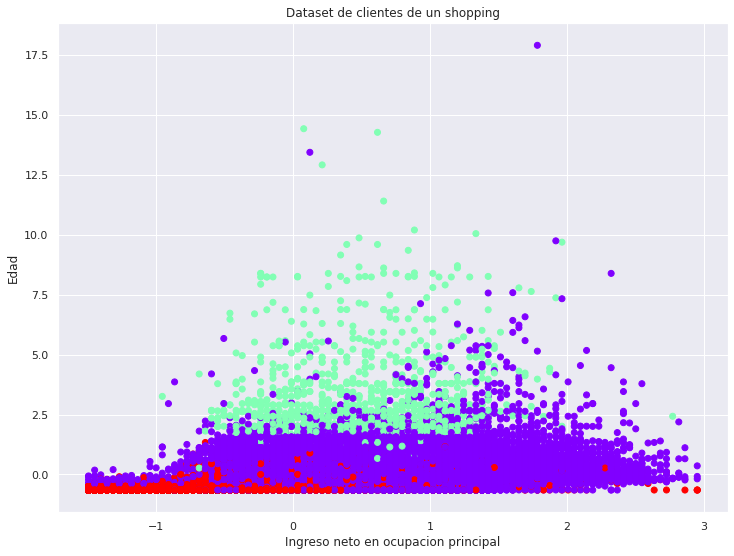

In [49]:
# Ploteamos los datos en el espacio de (Ingresos,Gastos) con un color por cada uno de los 5 clusters
plt.figure(figsize=(12, 9))
plt.title("Dataset de clientes de un shopping")
plt.scatter(x=data_cluster_scaled[:,9], y=data_cluster_scaled[:,6], c=cluster.labels_, cmap='rainbow')
plt.xlabel("Ingreso neto en ocupacion principal")
plt.ylabel("Edad")

## Analisis con kmeans

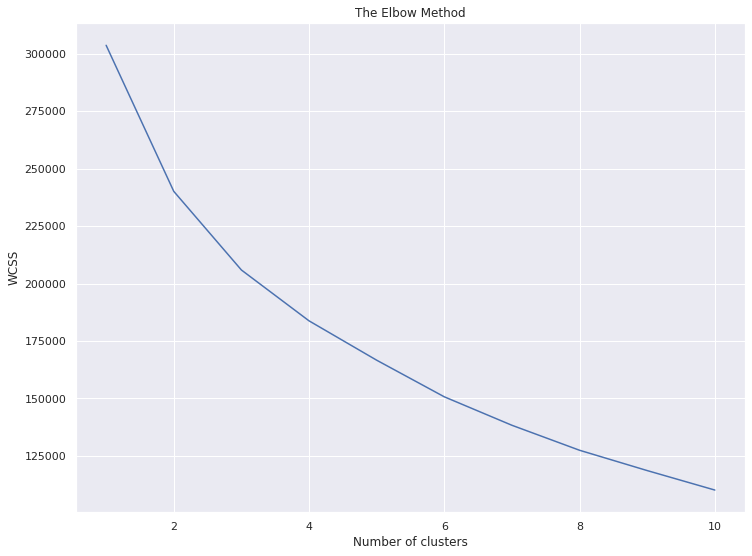

In [50]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data_cluster_scaled)
    wcss.append(kmeans.inertia_)

# Grafica de la suma de las distancias
plt.figure(figsize=(12, 9))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [51]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42) #k-means++ acelera la convergencia, respecto de random
y_kmeans = kmeans.fit_predict(data_cluster_scaled)

In [52]:
y_kmeans

array([2, 2, 0, ..., 0, 1, 1], dtype=int32)

In [53]:
data_cluster['pred']=y_kmeans

In [54]:
data_cluster

,v213bi,v214bi,v215bi,v216bi,v217bi,v163,ITI,v213b,ITLi,v108,t_hogar,pred
0,4500.0,0.0,0.0,0.0,0.0,10.0,4500.000000,4500.000000,4500.000000,56.0,5.0,2
1,4000.0,0.0,0.0,0.0,0.0,14.0,4000.000000,4000.000000,4000.000000,51.0,5.0,2
2,0.0,0.0,0.0,0.0,0.0,25.0,95.794861,191.135047,193.736619,31.0,5.0,0
3,0.0,0.0,0.0,0.0,0.0,12.0,95.615012,1933.326609,1933.326609,31.0,5.0,0
4,0.0,0.0,0.0,0.0,0.0,3.0,83.597514,106.742496,103.468720,7.0,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
27600,0.0,0.0,0.0,1014.0,0.0,3.0,1014.000000,256.554478,275.112981,10.0,8.0,0
27601,0.0,0.0,0.0,0.0,0.0,1.0,83.597387,106.765348,103.483595,5.0,8.0,0
27602,0.0,0.0,0.0,0.0,0.0,8.0,83.546284,106.443719,100.539291,1.0,8.0,0
27603,25353.0,0.0,0.0,0.0,0.0,35.0,25353.000000,25353.000000,25353.000000,42.0,7.0,1


In [55]:
data_cluster.groupby(['pred']).mean()

,v213bi,v214bi,v215bi,v216bi,v217bi,v163,ITI,v213b,ITLi,v108,t_hogar
pred,,,,,,,,,,,
0,377.108027,3.415931,27.563435,198.335174,34.503174,7.024236,781.679962,639.306888,634.526364,16.812897,5.297739
1,16795.886198,526.347395,457.383784,138.367568,672.512312,11.154167,18876.706506,17224.324632,17805.665620,44.505105,3.487688
2,3009.632890,46.877335,1414.083667,85.900730,252.891871,17.815038,5067.316117,3771.940303,3824.823541,51.095797,3.347622


In [56]:
X = data_cluster.iloc[:, :11].values

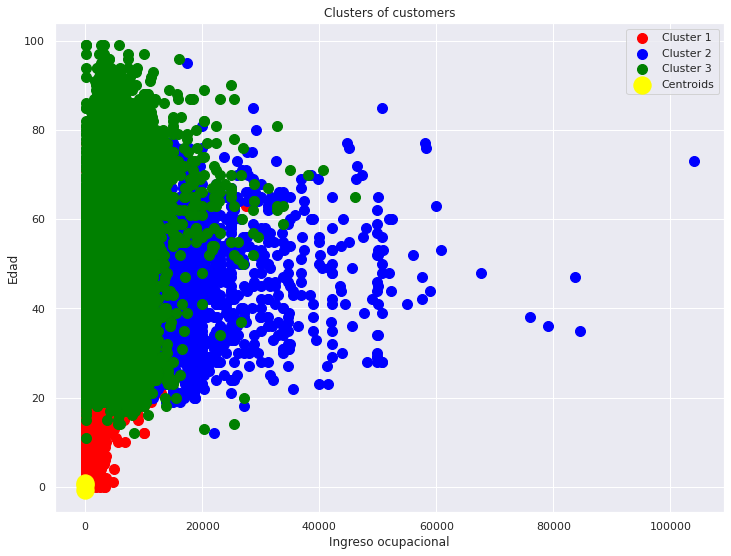

In [57]:
# Visualizacion grafica de los clusters
plt.figure(figsize=(12, 9))
plt.scatter(X[y_kmeans == 0, 6], X[y_kmeans == 0, 9], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 6], X[y_kmeans == 1, 9], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2,6], X[y_kmeans == 2, 9], s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3, 6], X[y_kmeans == 3, 9], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 6], X[y_kmeans == 4, 9], s = 100, c = 'magenta', label = 'Cluster 5')
#plt.scatter(X[y_kmeans == 5, 6], X[y_kmeans == 5, 9], s = 100, c = 'black', label = 'Cluster 6')
plt.scatter(kmeans.cluster_centers_[:, 6], kmeans.cluster_centers_[:, 9], s = 300, c = 'yellow', label = 'Centroids')


plt.title('Clusters of customers')
plt.xlabel('Ingreso ocupacional')
plt.ylabel('Edad')
plt.legend()
plt.show()